# Training Linear Models

In [1]:
import sys 
assert sys.version_info >= (3,7)

In [2]:
import matplotlib.pyplot as plt 
from pathlib import Path 

IMAGES_PATH = Path() / "images" / "training_linear_models" 
IMAGES_PATH.mkdir(parents=True, exist_ok=True) 

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = IMAGES_PATH / f"{fig_id}.{fig_extension}" 
    if tight_layout:
        plt.tight_layout() 
    plt.savefig(path, format=fig_extension, dpi=resolution)

## Linear Regression

### The Normal Equation

In [3]:
import numpy as np 

np.random.seed(42) 
m = 100 
X = 2 * np.random.rand(m,1) #values from an uniform distribution 
y = 4 + 3 * X + np.random.randn(m,1) #sample from standard normal 

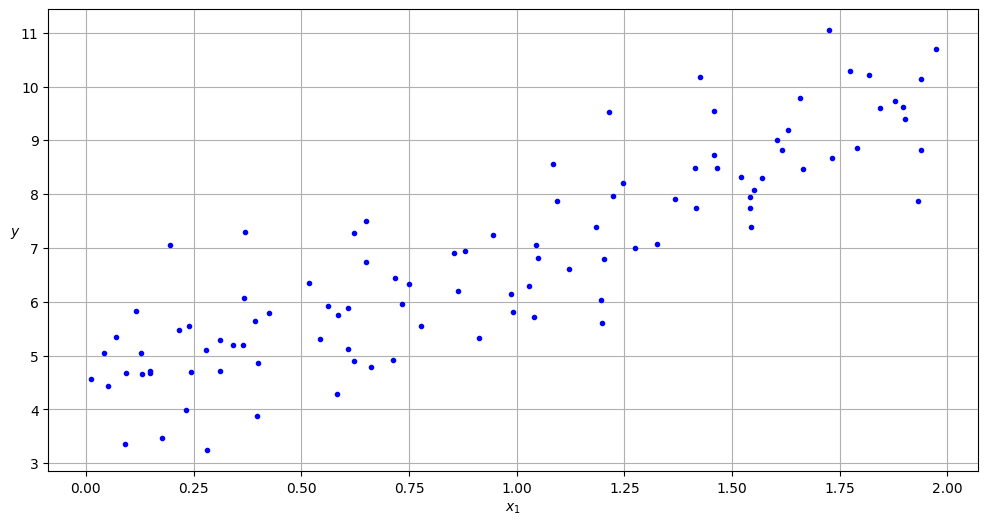

In [4]:
plt.figure(figsize=(12,6)) 
plt.plot(X, y, "b.") 
plt.xlabel("$x_1$")
plt.ylabel("$y$", rotation=0) 
plt.grid() 
plt.show()

In [5]:
from sklearn.preprocessing import add_dummy_feature 

X_b = add_dummy_feature(X) #add x0=1 to each instance 
theta_best = np.linalg.inv(X_b.T @ X_b) @ X_b.T @ y 

In [7]:
theta_best

array([[4.21509616],
       [2.77011339]])

The original y was:

$
y = 4 + 3X + noise
$

### Predictions

In [6]:
X_new = np.array([[0], [2]])

Here's the prediction for the values $x = 0$ and $x = 2$

In [7]:
X_new
X_new_b = add_dummy_feature(X_new) 
y_predict = X_new_b @ theta_best

In [8]:
y_predict

array([[4.21509616],
       [9.75532293]])

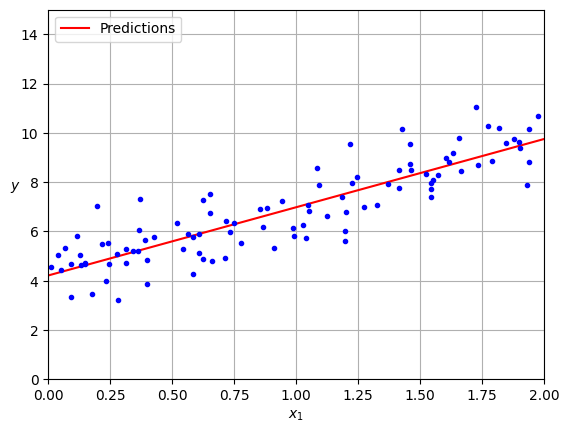

In [9]:
plt.plot(X_new, y_predict, 'r-', label = "Predictions") 
plt.plot(X, y, " b.")
plt.xlabel("$x_1$")
plt.ylabel("$y$", rotation=0)
plt.axis([0, 2, 0, 15])
plt.grid()
plt.legend(loc="upper left")
# save_fig("linear_model_predictions_plot")

plt.show()

### Using Scikit Learn 

In [10]:
from sklearn.linear_model import LinearRegression 

lin_reg = LinearRegression() 
lin_reg.fit(X, y) 

lin_reg.intercept_, lin_reg.coef_

(array([4.21509616]), array([[2.77011339]]))

In [11]:
lin_reg.predict(X_new)

array([[4.21509616],
       [9.75532293]])

## Gradient Descent